# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [48]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/billzito/Documents/Udacity/sdc/p2-traffic-signs/CarND-Traffic-Signs/traffic-signs-data/train.p'
testing_file = '/Users/billzito/Documents/Udacity/sdc/p2-traffic-signs/CarND-Traffic-Signs/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, X_validate, y_train, y_validate = train_test_split(train['features'], train['labels'], test_size=0.10, random_state=0)
# X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("validation set: {} samples".format(len(X_validate)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   35288 samples
validation set: 3921 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [49]:
### Replace each question mark with the appropriate value.

n_train = X_train.shape[0]
n_validate = X_validate.shape[0]
n_test =  X_test.shape[0]
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validate)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 35288
Number of validation examples = 3921
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

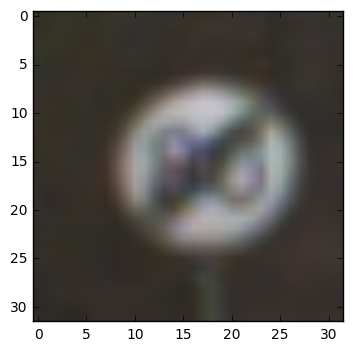

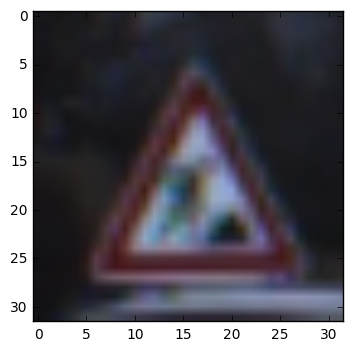

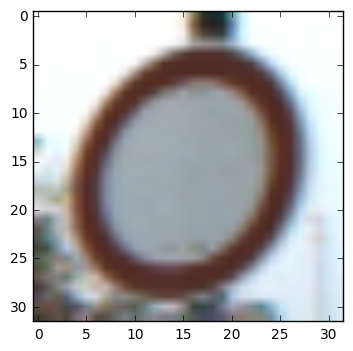

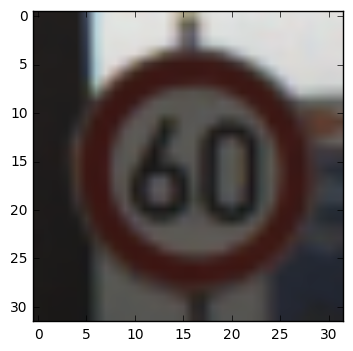

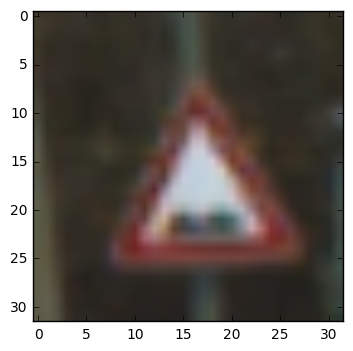

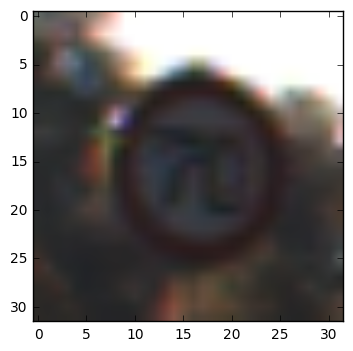

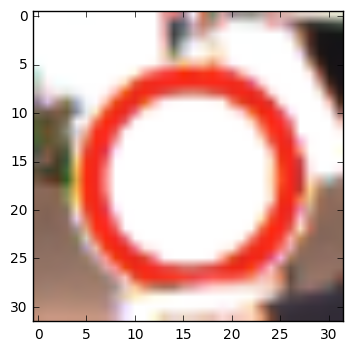

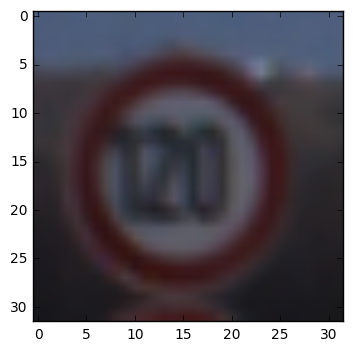

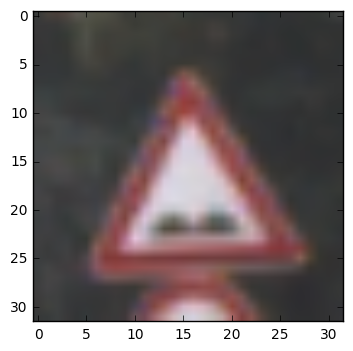

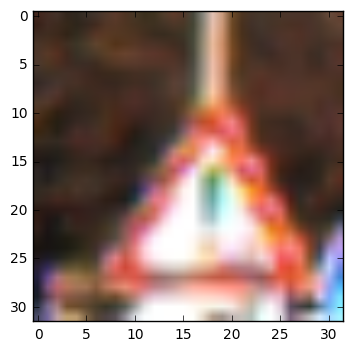

In [50]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

for num in range(10):
    rand = randint(0, 12630)
    plt.figure()
    plt.imshow(X_test[rand])

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [51]:
import cv2
import numpy as np
print("Image Shape: {}".format(X_train[0].shape) + '\n')
orig = X_train[0].shape
test = np.reshape(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1))
print("test shape: {}".format(test.shape) + '\n')
# plt.imshow(test, cmap='gray')
X_train_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_train]
X_validate_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_validate]
X_test_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_test]

print("after grayed Shape: {}".format(X_train_gray[0].shape) + '\n')
# print(len(X_train_gray), len(X_validate_gray), len(X_test_gray))

from sklearn.utils import shuffle

X_train_gray, y_train = shuffle(X_train_gray, y_train)

Image Shape: (32, 32, 3)

test shape: (32, 32, 1)

after grayed Shape: (32, 32, 1)

35288 3921 12630


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
1. I converted colored images to grayscale images. Color may seem like a useful identifier in determining what the sign is. However, since brightness differs so drastically, even images of the same sign may have very different color values, and so color information may add noise. I tested this empirically, and my model performed better with grayscaling the images.
2. I shuffled the data so that it wouldn't be in any patterned order, such as all of the signs being in a row. This would cause problems for the training algorithm as we would train the model on batches of the same image instead of getting a random distribution across iamges.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
As decribed above, I broke my data into training and validation sets and shuffled it. I split it into training and validation so that I could tell how my model was doing at each epoch. For example, before I introduced dropout in my model, I was overfitting and so my model would drmatically decrease its effectiveness. Testing is only done at the end, and is considered the final score of the model.

I also shuffled the data, as described above, to remove any bias towards patterns in the existing dataset. 

In [53]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

# graph = tf.Graph()
# with graph.as_default():

patch_size = 5
num_channels = 1 #grayscale
depth_1 = 6
depth_2 = 16
full_1_output = 120
full_2_output = 84
full_3_output = 43
dropout_keepers = .8

def LeNet(x):   
    # Hyperparameters
    mu = 0
    
    #why use stddev 0.1?
    sigma = 0.1

    weights = {
        'layer_1': tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth_1], mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal([patch_size, patch_size, depth_1, depth_2], mean=mu, stddev=sigma)),
        'layer_3': tf.Variable(tf.truncated_normal([400, full_1_output], mean=mu, stddev=sigma)),
        'layer_4': tf.Variable(tf.truncated_normal([full_1_output, full_2_output], mean=mu, stddev=sigma)),
        'layer_5': tf.Variable(tf.truncated_normal([full_2_output, full_3_output], mean=mu, stddev=sigma))
    }
    
    biases = {
        'layer_1': tf.Variable(tf.zeros([depth_1])),
        'layer_2': tf.Variable(tf.zeros(shape=[depth_2])),
        'layer_3': tf.Variable(tf.zeros(shape=[full_1_output])),
        'layer_4': tf.Variable(tf.zeros(shape=[full_2_output])),
        'layer_5': tf.Variable(tf.zeros(shape=[full_3_output]))
    }

    
    # getting rid of one col and one row on each side with valid will only move to 30, 30? I guess not because 
    # deleting rows also removes columns--> 4 lost 
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv = tf.nn.conv2d(x, weights['layer_1'], [1, 1, 1, 1], padding='VALID')
#   print('conv is', conv)
    
    # TODO: Activation.
    hidden_1 = tf.nn.dropout(tf.nn.relu(conv + biases['layer_1']), dropout_keepers)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    max_1 = tf.nn.max_pool(hidden_1, [1, 2, 2, 1], [1, 2, 2, 1], padding="SAME")
#   print('max 1', max_1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_2 = tf.nn.conv2d(max_1, weights['layer_2'], [1, 1, 1, 1], padding="VALID")
#   print('conv_2', conv_2)

    # TODO: Activation.
    hidden_2 =  tf.nn.dropout(tf.nn.relu(conv_2 + biases['layer_2']), dropout_keepers)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    max_2 = tf.nn.max_pool(hidden_2, [1, 2, 2, 1], [1, 2, 2, 1], padding="SAME")
#   print('max 2', max_2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    # multiply all vals times each other-- reshape to -1? 
#   max_shape = tf.size(max_2)
#   print(max_shape)
#   flat = tf.reshape(max_2, [-1, 5 * 5 * 16])
#   print('flat', flat)
    flat = flatten(max_2)

    # tried to do these together
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    # TODO: Activation.
    full_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(flat, weights['layer_3']) + biases['layer_3']), dropout_keepers)
#   print('full_1 is', full_1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    full_2 =  tf.nn.dropout(tf.nn.relu(tf.matmul(full_1, weights['layer_4']) + biases['layer_4']), dropout_keepers)
#   print('full_2 is', full_2)

    # TODO: Activation.

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(full_2, weights['layer_5']) + biases['layer_5']
#     print('logits are', logits)

    return logits, weights

# l, w = LeNet(X_train)
# print('weights are', w)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used the architecture of LeNet5 due to its ability to effectively classify images. The only difference is that I start with grayscale images and so the number of channels is 1.
1. convolutional layer moves from 32x32x1 to 28x28x6 (increases depth to 6)
2. relu activation finds non-linear patterns in the data
3. max pooling takes the max pixel from a set of pixels to reduce the dimensions
4. cnn layer moves from maxpool (14x14x6) to (10x10x16) increasing depth again
5. relu activation finds patterns
6. max pooling again to get top pixels from that set
7. (0) flatten so that that can run final logistic regression (matrix multiplies) on our weights
8. (4) run two logistic regressions with hidden layers at end to finalize our scores
9. run final classifier at the end to convert to binary scores
10. apply dropout to all hidden layers to reduce overfitting

counting the 4 hidden layers, there are 11 layers. 

In [54]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
last_validation_score = 0

EPOCHS = 30

rate = 0.001
# beta = 0.001

logits, weights = LeNet(x)
# l2 = tf.nn.l2_loss(weights['layer_1']) + tf.nn.l2_loss(weights['layer_2']) + tf.nn.l2_loss(weights['layer_3']) + tf.nn.l2_loss(weights['layer_4']) + tf.nn.l2_loss(weights['layer_5'])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# cross_entropy + beta * l2
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validate_gray, y_validate)
#         if validation_accuracy < last_validation_score
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    test_accuracy = evaluate(X_test_gray, y_test)
    print('you know who i am', test_accuracy)
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.332

EPOCH 2 ...
Validation Accuracy = 0.586

EPOCH 3 ...
Validation Accuracy = 0.723

EPOCH 4 ...
Validation Accuracy = 0.774

EPOCH 5 ...
Validation Accuracy = 0.812

EPOCH 6 ...
Validation Accuracy = 0.848

EPOCH 7 ...
Validation Accuracy = 0.860

EPOCH 8 ...
Validation Accuracy = 0.881

EPOCH 9 ...
Validation Accuracy = 0.875

EPOCH 10 ...
Validation Accuracy = 0.901

EPOCH 11 ...
Validation Accuracy = 0.901

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 13 ...
Validation Accuracy = 0.908

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.919

EPOCH 16 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 21 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.945

EPOCH 23 ...
Validation Accuracy = 0.947

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used the adamoptimizer, which changes the gradient based on the past gradients in a similar way to momentum. In comparison to normal gradient descent, the adamoptimizer allows us to more efficiently find the optimum by dynamically changing the gradient. Learning rates are typically between .01 and .0001, and through testing multiple options, I found that .001 works well. Batch size is typically between 32 and 256, and through testing multiple options I found that 128 worked well. Tried l2 normalization but that didn't seem to help. I tried multiple dropout amounts--(.5 gave awful results, no dropout led to overfitting after epoch 3), but .8 seemed to work well. I ran it for 30 epochs, after finding that the model stopped improving accuracy at 30. Weights set to the default values of 0 mean and .1 standard deviation to start to resemble a normal distribution.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. I thought that the lenet architecture would work well, and so I started with its artichecture and improved my hyperparameters step by step. 

2. My lenet direct copy had 18.5% accuracy after 10 epochs, and so I used a validation set to figure out what was happening. I found out that the model was overfitting by epoch 3, but was reaching 80% accuracy by epoch 3. 

3. I next experimented with dropout to prevent overfitting. By moving to a dropout of .5, I was able to reach 90% accuracy. I tried increasing the number of epochs, but it started overfitting by 10. 

4. Next, I tried adding l2 loss for all weights, but did not see improvments in the scores.

5. I tried different dropout values, and found that with a dropout of .8 and moving up to 30 epochs, I was able to get my validation score up to 93%. 

6. I then tried adding in preprocessing, switching to grayscale images since the color spectrum may be deceiving when some images are much brighter than others. After the preprocessing step, my model reached 96% validation accuracy and 90% test accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

logits are
cross entr [39]
logits are
cross entr [18]
logits are
cross entr [14]
logits are
cross entr [9]
logits are
cross entr [40]
logits are
cross entr [2]
logits are
cross entr [12]


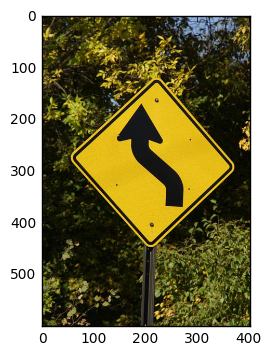

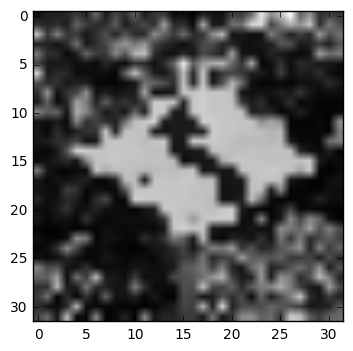

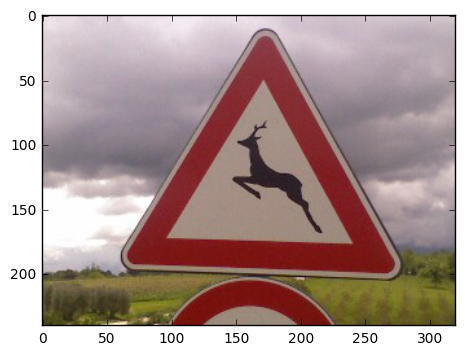

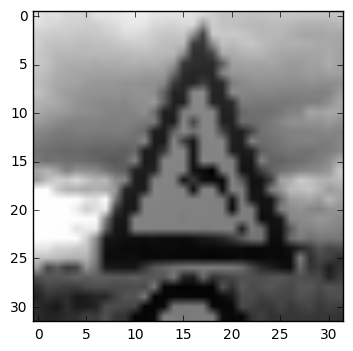

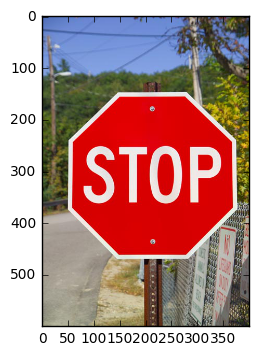

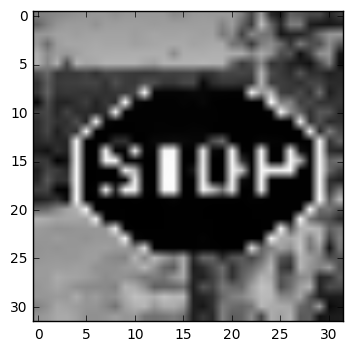

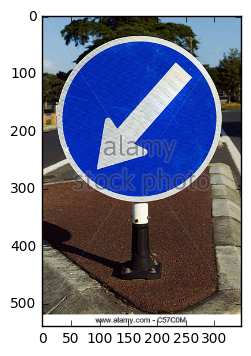

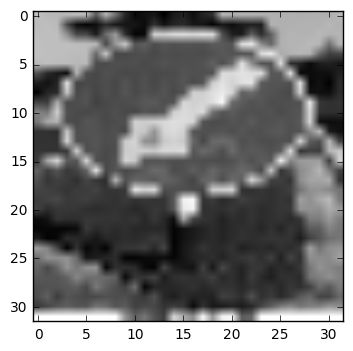

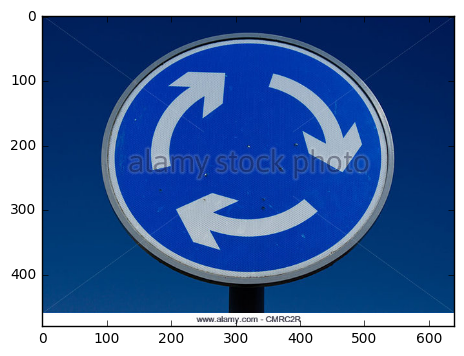

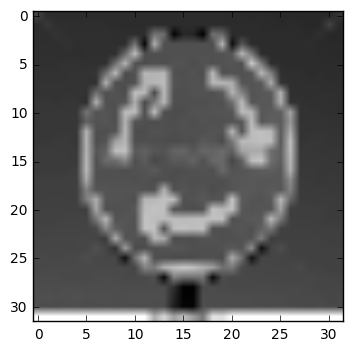

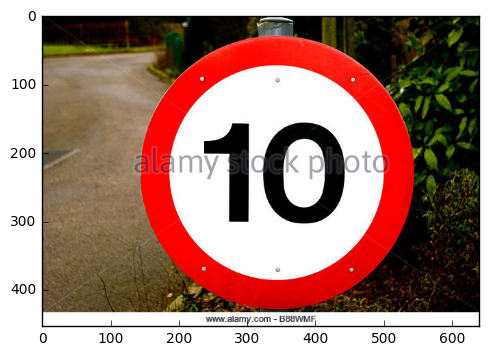

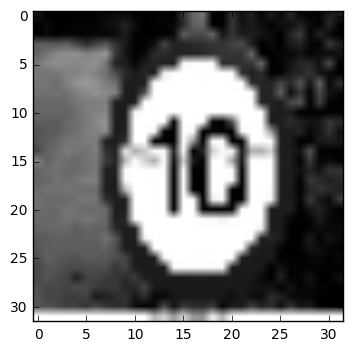

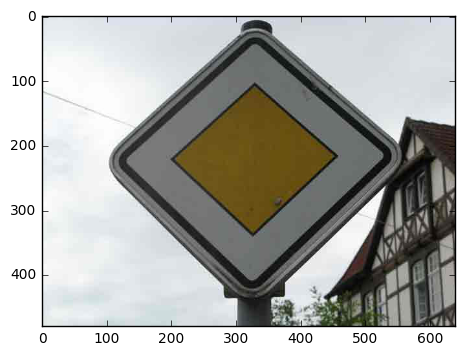

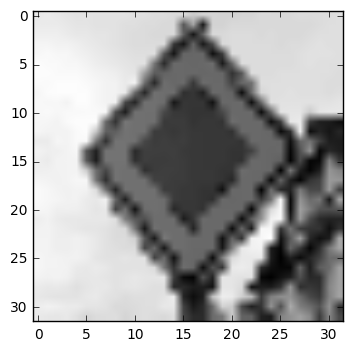

In [132]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
dir = 'wild-signs/'
files = os.listdir(dir)
# first_img = mpimg.imread(dir + files[0])
# img_shape = first_img.shape
# print('allimages', all_images.shape)
for count, filename in enumerate(files):
    plt.figure()
    img = mpimg.imread(dir + filename)
    plt.imshow(img)

    resized = cv2.resize(img, (32, 32))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#     print('gray shape before resize', gray.shape)
    plt.figure()
    plt.imshow(gray, cmap='gray')
    gray = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32)
#     print('datatype', gray.dtype)
#     print('gray shape  resize', gray.shape)

    
    sess = tf.Session()
#     ckpt = tf.train.get_checkpoint_state('')
#     print('ckpt', ckpt, 'path', ckpt.model_checkpoint_path)
    saver.restore(sess, './lenet')
    print('logits are')
#     a = tf.constant(2)
    test = logits.eval(feed_dict={x:gray}, session=sess)
    cross_entropy = tf.argmax(test, 1)
    print('cross entr', cross_entropy.eval(session=sess))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

I tested all 7 traffic signs. I expect the stop sign to be particularly difficult beacuse it is not in german. Additionally, the yellow diamond is not in the dataset. Additionally, the images are all at different scales, and so when they are rescaled to 32x32 they appear to have slightly different dimensions. The first sign, the upper-left arrow, seems particularly distorted. Furthermore, the images with shuttershock watermarks over them may cause some confusion in the model. Finally, all the images appear to be daytime images and so brightness should not be a large problem in classifying, although many of the training images are darker than these tests.

**Answer:**

size (600, 402, 3)
resized shape (32, 32, 3)
size (240, 320, 3)
resized shape (32, 32, 3)
size (600, 400, 3)
resized shape (32, 32, 3)
size (540, 347, 3)
resized shape (32, 32, 3)
size (481, 640, 3)
resized shape (32, 32, 3)
size (454, 640, 3)
resized shape (32, 32, 3)
size (480, 640, 3)
resized shape (32, 32, 3)


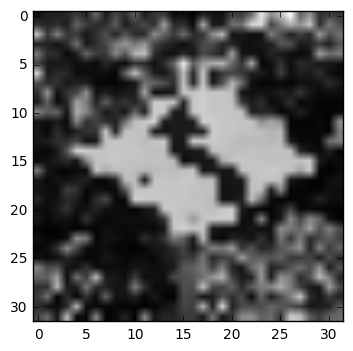

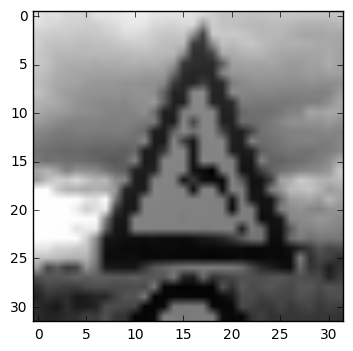

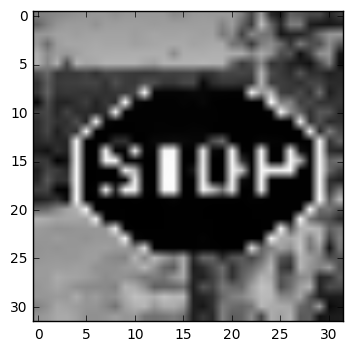

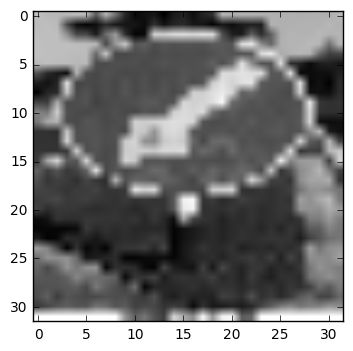

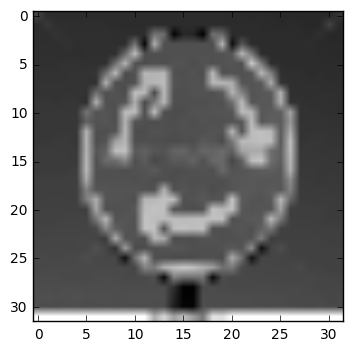

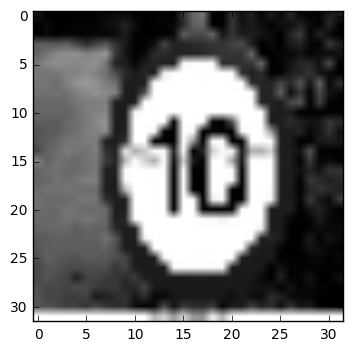

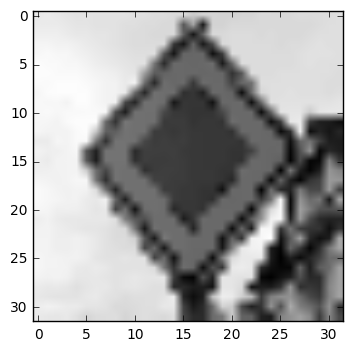

In [72]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# print('saver is', saver)    
# test = sess.run(feed_dict={})


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.